In [18]:
from spider_net.visualizer import *
import time
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
pd.options.display.max_columns = 100
plt.style.use('material')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Prune Visualization

# Train Visualization

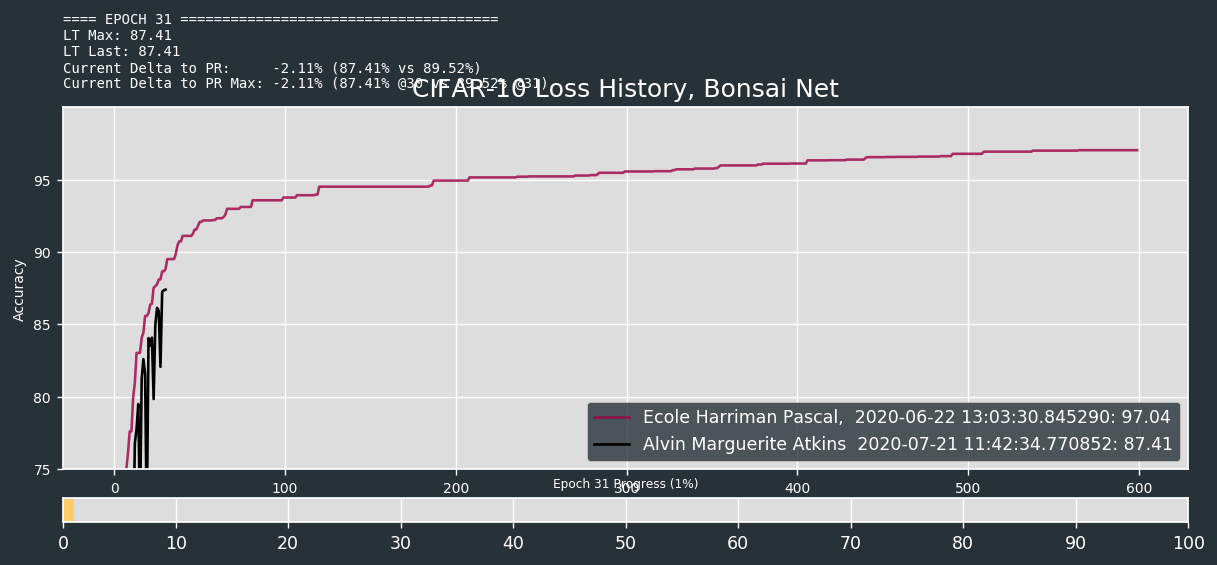

In [ ]:
TrainPlot().monitor()

# Jupyter Notebook Output

In [ ]:
prev_out = None
out = "something"
state = 0
states = [".","..","..."]
while 1:
    with open('logs/jn_out.log',"r") as f:
        lines = f.readlines()
    out = ""
    for i,line in enumerate(lines):
        if "|carr_ret|" not in line:
            out+=line
    if prev_out!=out:
        clear_output()
        print(out)
        prev_out, state = out, 0
    else:
        state = 0 if state==2 else state+1
        print("\r{:<3}".format(states[state]),end="")
        time.sleep(1)

In [8]:
df = proc_all_runs()
df
#df.loc[3600]
#min(df.loc[3577]['Params'])
#df.loc[3604]

,AT Test Top-1,Aux,Classes,Deadhead,Dim,Epoch_Times,Epochs,ID,LT Test Top-1,Loss Accuracy,Loss Edge,Loss Input,N,Nodes,Params,Patterns,Pruners,Reductions,Scale,Spacing,Start Time,Total_Train_Time,Train Top-1,LT Test Top-1 Max,Epoch
0,[],NaN,NaN,"[0, 0]",NaN,[],"[0, 1]",NaN,[17.68],[],[],[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-11 10:07:32.966476,0.00s,[24.0],17.68,1
1,[],True,NaN,[0],"[2048, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,1.0,2019-06-11 10:09:18.629224,0.00s,[],0.00,0
2,[],True,NaN,"[0, 0]","[2048, 3, 32, 32]",[],"[0, 1]",NaN,[12.03],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,1.0,2019-06-11 10:10:06.356830,0.00s,[22.52],12.03,1
3,[],True,NaN,"[0, 0]","[2048, 3, 32, 32]",[],"[0, 1]",NaN,[24.83],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,1.0,2019-06-11 10:11:12.910642,0.00s,[32.54],24.83,1
4,[],True,NaN,[0],"[64, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:12:32.888662,0.00s,[],0.00,0
5,[],True,NaN,[0],"[64, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:14:11.580808,0.00s,[],0.00,0
6,[],True,NaN,[0],"[64, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:36:21.880656,0.00s,[],0.00,0
7,[],True,NaN,"[0, 0, 0, 0, 0, 0]","[64, 3, 32, 32]","[3189, 3193, 3196, 3200, 3200]","[0, 1, 2, 3, 4, 5]",NaN,"[35.7, 48.47, 62.74, 65.19, 69.08]",[],[],[],NaN,6.0,NaN,NaN,True,5.0,3.0,3.0,2019-06-11 10:39:23.575844,"4h,26m,18s","[40.13, 51.62, 58.02, 64.3, 64.81]",69.08,5
8,[],True,NaN,[0],"[2048, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,2.0,2019-06-11 15:51:24.336246,0.00s,[],0.00,0
9,[],True,NaN,[0],"[2048, 3, 32, 32]",[],[0],NaN,[],[],[],[],NaN,3.0,NaN,NaN,True,2.0,2.0,2.0,2019-06-11 15:51:48.510565,0.00s,[],0.00,0


# Specific Comparisons

In [22]:
def total_time(t_str):
    h,m,s=0,0,0
    orig=t_str
    if 'h' in t_str:
        h = int(t_str.split("h")[0])
        t_str = t_str.split(",",1)[1]
    if 'm' in t_str:
        m = int(t_str.split("m")[0])
        t_str = t_str.split(",",1)[1]
    if 's' in t_str:
        print(t_str)
        s = float(t_str.split("s")[0])
    return h*60*60+m*60+s

df = proc_all_runs()
df = df[df['Start Time'].apply(lambda x: '2020-02' in x)]

df = df[df['ID'].apply(lambda x: 'Mindanao' in x or 'Gaul Millard' in x or 'Hutchinson Monaco' in x)]
df = df[df['Epoch_Times'].apply(lambda x: len(x)>1)]
df['TotTime']=df['Total_Train_Time'].apply(total_time)
df.groupby("ID")['TotTime'].sum().apply(show_time)

47s
35s
25s
6s
6s
15s
54s
59s
34s
18s
37s
39s
4s


ID
Chisholm Gaul Millard            92h,56m,59s
Cygnus Hutchinson Monaco         69h,45m,37s
Mindanao Samuelson Riviera        80h,56m,0s
Mindanao Samuelson Riviera_r3    52h,58m,43s
Name: TotTime, dtype: object

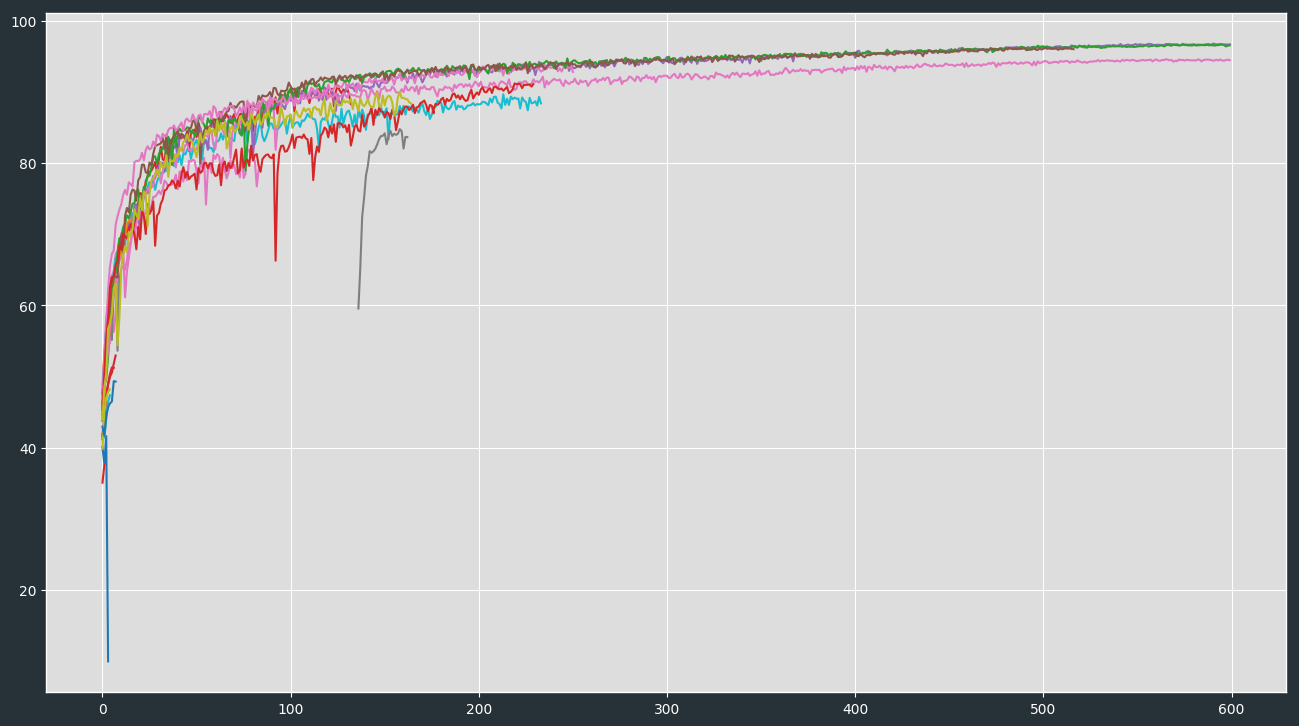

In [8]:
df = proc_all_runs()
df = df[df['Start Time'].apply(lambda x: '2020-02' in x)]
df = df.groupby('ID')['Epochs','LT Test Top-1','Start Time','LT Test Top-1 Max'].agg(list)
df['Epochs'] = df['Epochs'].apply(lambda x: [sub for l in x for sub in l])
df['LT Test Top-1'] = df['LT Test Top-1'].apply(lambda x: [sub for l in x for sub in l])
df['LT Test Top-1 Max'] = df['LT Test Top-1 Max'].apply(max)
for idx,row in df.iterrows():  
    stop = min(len(row['Epochs']),len(row['LT Test Top-1']))
    plt.plot(row['Epochs'][:stop],row['LT Test Top-1'][:stop])
plt.show()

#

In [ ]:
df = proc_all_runs()
df

In [ ]:
full_runs = df[df[['LT Test Top-1','Epochs']].\
    apply(lambda x: len(x['LT Test Top-1']) > 512,axis=1)]. \
    sort_values(by='LT Test Top-1 Max', ascending=False)
full_runs[['ID','LT Test Top-1','LT Test Top-1 Max']]

In [ ]:

full